In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1234)

In [3]:
def radial(x):
    return np.sum(x**2, axis=1)

def schwefel(x):
    return -np.sum(x*np.sin(np.sqrt(np.abs(x))), axis=1)

In [4]:
def mutate(x, v, m, a=1):
    
    # Take m copies of each parent
    x = np.repeat(x, m, axis=0)
    v = np.repeat(v, m, axis=0)
    
    # Update variabilities
    d = x.shape[-1]
    theta = np.random.normal(size=v.shape)/d**0.5
    v = v*np.exp(theta)
    
    # Update positions
    x = x + v*np.random.normal(size=v.shape)
    
    return x, v

In [5]:
def select(x, v, n, fitness):
    f = fitness(x)
    idx = np.argpartition(f, -n)[-n:]
    return x[idx], v[idx]

In [6]:
def evo_one_generation(x, v, n, m, fitness):
    """
    Evolve population over one generation (mutation and selection)
    
    Parameters
    ----------
    x : ndarray, shape=(n, d)
        Initial population
    v : ndarray, shape=(n, d)
        Variability on initial population
    n : int
        Size of the population
    m : int
        Number of mutants per generation
    fitness : callable
        Fitness function.
        
    """
    x_mut, v_mut = mutate(x, v, m)
    x_sel, v_sel = select(x_mut, v_mut, n, fitness)
    return x_sel, v_sel

In [7]:
def fitness(x):
    return -radial(x)

In [8]:
def computational_experiment(n, m, n_iter=100, d=7):

    x = np.random.uniform(-10, 10, size=(n, d))
    v = np.random.normal(size=(n, d))

    history_x = []
    history_v = []
    history_fitness = []
    for _ in range(n_iter):
        x, v = evo_one_generation(x, v, n, m, fitness)
        history_x.append(x)
        history_v.append(v)
        history_fitness.append(fitness(x))

    return history_x, history_v, history_fitness

In [9]:
xs, vs, fs = computational_experiment(1, 100)

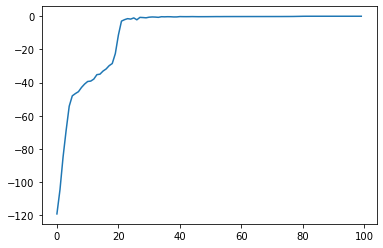

In [10]:
plt.plot(fs)

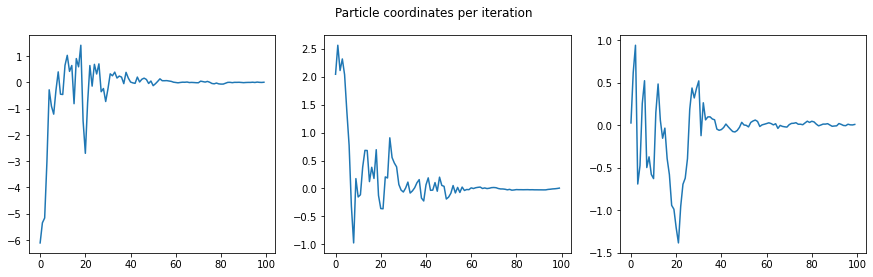

In [11]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 4))
axes[0].plot([item[0, 0] for item in xs])
axes[1].plot([item[0, 1] for item in xs])
axes[2].plot([item[0, 2] for item in xs])
fig.suptitle("Particle coordinates per iteration")

pass

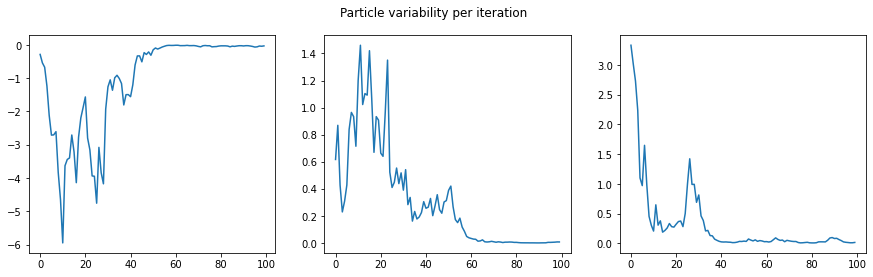

In [12]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 4))
axes[0].plot([item[0, 0] for item in vs])
axes[1].plot([item[0, 1] for item in vs])
axes[2].plot([item[0, 2] for item in vs])
fig.suptitle("Particle variability per iteration")

pass

Text(0.5, 0.98, 'Fitness for N simulations (1, 100)')

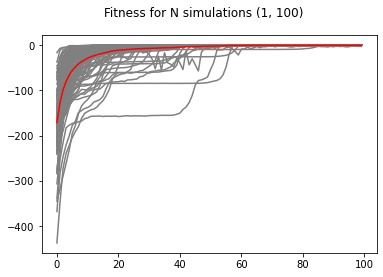

In [13]:
fig, ax = plt.subplots()

all_fs_100 = []
for _ in range(100):
    _, _, fs = computational_experiment(1, 100)
    all_fs_100.append(fs)
    ax.plot(fs, color="gray")
    
all_fs_100 = np.squeeze(np.asarray(all_fs_100))
ax.plot(np.mean(all_fs_100, axis=0), color="red")

fig.suptitle("Fitness for N simulations (1, 100)")

Text(0.5, 0.98, 'Fitness for N simulations (1, 10)')

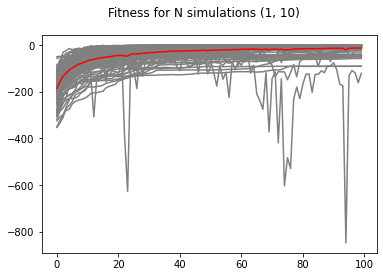

In [14]:
fig, ax = plt.subplots()

all_fs_10 = []
for _ in range(100):
    _, _, fs = computational_experiment(1, 10)
    ax.plot(fs, color="gray")
    all_fs_10.append(fs)
    
all_fs_10 = np.squeeze(np.asarray(all_fs_10))
ax.plot(np.mean(all_fs_10, axis=0), color="red")

fig.suptitle("Fitness for N simulations (1, 10)")

Text(0.5, 0.98, 'Fitness for N simulations (1, 500)')

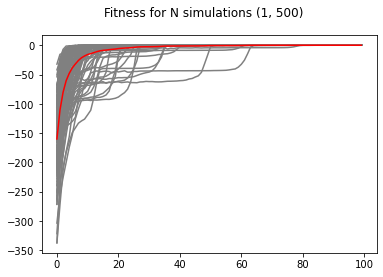

In [15]:
fig, ax = plt.subplots()

all_fs_500 = []
for _ in range(100):
    _, _, fs = computational_experiment(1, 500)
    all_fs_500.append(fs)
    ax.plot(fs, color="gray")
    
all_fs_500 = np.squeeze(np.asarray(all_fs_500))
ax.plot(np.mean(all_fs_500, axis=0), color="red")

fig.suptitle("Fitness for N simulations (1, 500)")

Text(0.5, 0.98, 'Fitness for N simulations (10, 100)')

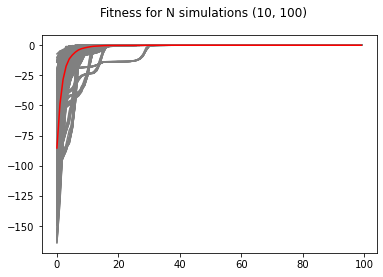

In [16]:
fig, ax = plt.subplots()

all_fs_10_100 = []
for _ in range(100):
    _, _, fs = computational_experiment(10, 100)
    ax.plot(fs, color="gray")
    all_fs_10_100.append(fs)
    
all_fs_10_100 = np.squeeze(np.asarray(all_fs_10_100))
ax.plot(np.mean(np.mean(all_fs_10_100, axis=2), axis=0), color="red")

fig.suptitle("Fitness for N simulations (10, 100)")

In [17]:
means = {
    "10": np.mean(all_fs_10, axis=0),
    "100": np.mean(all_fs_100, axis=0),
    "500": np.mean(all_fs_500, axis=0),
    "10_100": np.mean(np.mean(all_fs_10_100, axis=2), axis=0),
}

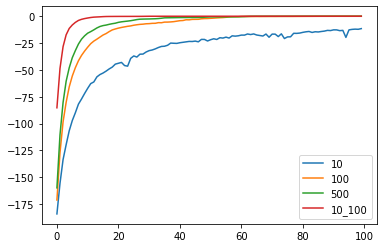

In [18]:
fig, ax = plt.subplots()
for key, m in means.items():
    ax.plot(m, label=key)
ax.legend()

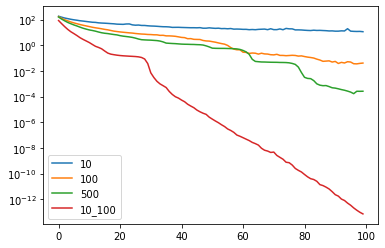

In [19]:
fig, ax = plt.subplots()
for key, m in means.items():
    ax.semilogy(-m, label=key)
ax.legend()